# Predict Droughts using Weather & Soil Data


By: Wihar Paladugula <br/>

ID: RQ47971

Data Scource: https://www.kaggle.com/datasets/cdminix/us-drought-meteorological-data 

## Importing Necessary Packages

In [25]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns


## Reading the csv file

In [90]:
df = pd.read_csv("train_timeseries.csv")

## Exploring the data frame

In [91]:
print(f"The data has {df.shape[0]} rows and {df.shape[1]} columns")

The data has 19300680 rows and 21 columns


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19300680 entries, 0 to 19300679
Data columns (total 21 columns):
 #   Column       Dtype  
---  ------       -----  
 0   fips         int64  
 1   date         object 
 2   PRECTOT      float64
 3   PS           float64
 4   QV2M         float64
 5   T2M          float64
 6   T2MDEW       float64
 7   T2MWET       float64
 8   T2M_MAX      float64
 9   T2M_MIN      float64
 10  T2M_RANGE    float64
 11  TS           float64
 12  WS10M        float64
 13  WS10M_MAX    float64
 14  WS10M_MIN    float64
 15  WS10M_RANGE  float64
 16  WS50M        float64
 17  WS50M_MAX    float64
 18  WS50M_MIN    float64
 19  WS50M_RANGE  float64
 20  score        float64
dtypes: float64(19), int64(1), object(1)
memory usage: 3.0+ GB


In [93]:
df.columns

Index(['fips', 'date', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',
       'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',
       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',
       'WS50M_RANGE', 'score'],
      dtype='object')

In [94]:
df.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,...,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,...,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,...,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,...,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,...,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN


## Data Cleaning

In [95]:
df['date']=pd.to_datetime(df['date'])

In [96]:
df['year'] = df['date'].dt.year

In [97]:
min_year = df['year'].min()
max_year = df['year'].max()

print(f"Minimum Year: {min_year}")
print(f"Maximum Year: {max_year}")

Minimum Year: 2000
Maximum Year: 2016


> Reducing number of records so that memory is sufficient by taking data from 2010 to 2016

In [98]:
df = df[(df['year'] >= 2010) & (df['year'] <= 2016)]

In [99]:
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day
df['day_of_week'] = df['date'].dt.day_name()
df['score'].fillna(-1, inplace=True)
df['score'] = df['score'].round().astype(int)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6888742 entries, 3653 to 19300679
Data columns (total 25 columns):
 #   Column       Dtype         
---  ------       -----         
 0   fips         int64         
 1   date         datetime64[ns]
 2   PRECTOT      float64       
 3   PS           float64       
 4   QV2M         float64       
 5   T2M          float64       
 6   T2MDEW       float64       
 7   T2MWET       float64       
 8   T2M_MAX      float64       
 9   T2M_MIN      float64       
 10  T2M_RANGE    float64       
 11  TS           float64       
 12  WS10M        float64       
 13  WS10M_MAX    float64       
 14  WS10M_MIN    float64       
 15  WS10M_RANGE  float64       
 16  WS50M        float64       
 17  WS50M_MAX    float64       
 18  WS50M_MIN    float64       
 19  WS50M_RANGE  float64       
 20  score        int32         
 21  year         int64         
 22  month        int64         
 23  day          int64         
 24  day_of_week  object 

In [101]:
print(f"The data has {df.shape[0]} rows and {df.shape[1]} columns")

The data has 7947156 rows and 24 columns


In [102]:
min_year = df['year'].min()
max_year = df['year'].max()

print(f"Minimum Year: {min_year}")
print(f"Maximum Year: {max_year}")

Minimum Year: 2010
Maximum Year: 2016


In [103]:
df.score.unique()

array([-1,  0,  1,  2,  3,  4,  5])

In [104]:
df.isnull().sum()

fips           0
date           0
PRECTOT        0
PS             0
QV2M           0
T2M            0
T2MDEW         0
T2MWET         0
T2M_MAX        0
T2M_MIN        0
T2M_RANGE      0
TS             0
WS10M          0
WS10M_MAX      0
WS10M_MIN      0
WS10M_RANGE    0
WS50M          0
WS50M_MAX      0
WS50M_MIN      0
WS50M_RANGE    0
score          0
year           0
month          0
day            0
dtype: int64

## Test Data

In [16]:
test= pd.read_csv("test_timeseries.csv")

In [17]:
test['date']=pd.to_datetime(test['date'])
test['year'] = test['date'].dt.year
test['month'] = pd.DatetimeIndex(test['date']).month
test['day'] = pd.DatetimeIndex(test['date']).day
test['score'].fillna(-1, inplace=True)
test['score'] = test['score'].round().astype(int)

In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2271948 entries, 0 to 2271947
Data columns (total 24 columns):
 #   Column       Dtype         
---  ------       -----         
 0   fips         int64         
 1   date         datetime64[ns]
 2   PRECTOT      float64       
 3   PS           float64       
 4   QV2M         float64       
 5   T2M          float64       
 6   T2MDEW       float64       
 7   T2MWET       float64       
 8   T2M_MAX      float64       
 9   T2M_MIN      float64       
 10  T2M_RANGE    float64       
 11  TS           float64       
 12  WS10M        float64       
 13  WS10M_MAX    float64       
 14  WS10M_MIN    float64       
 15  WS10M_RANGE  float64       
 16  WS50M        float64       
 17  WS50M_MAX    float64       
 18  WS50M_MIN    float64       
 19  WS50M_RANGE  float64       
 20  score        int32         
 21  year         int64         
 22  month        int64         
 23  day          int64         
dtypes: datetime64[ns](1), fl

## Exploratory Data Analysis

In [68]:
counts=df['score'].round().value_counts()
counts

-1    6812736
 0     687760
 1     189216
 2     112133
 3      73619
 4      47027
 5      24665
Name: score, dtype: int64

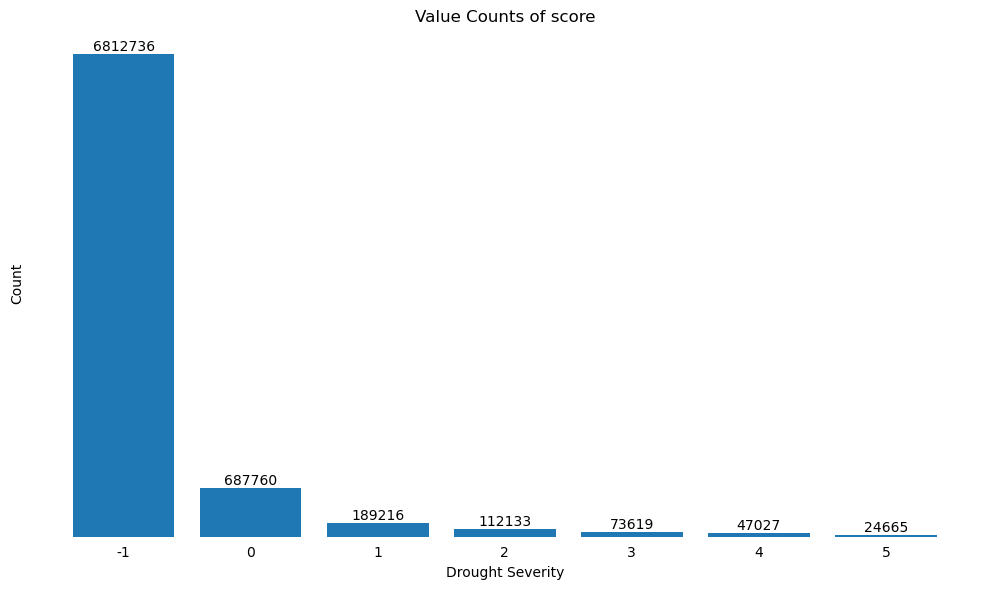

In [69]:
plt.figure(figsize=(10, 6))
plt.box(False) 

bars = plt.bar(counts.index, counts.values)

plt.xticks(counts.index, counts.index.astype(str), rotation=0) 
plt.yticks([])
plt.tick_params(bottom=False)

def autolabel(bars):
    """Attach a text label above each bar displaying its height"""
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height,
                 str(height), ha='center', va='bottom')

autolabel(bars)
plt.xlabel("Drought Severity") 
plt.ylabel("Count")
plt.title('Value Counts of score')
plt.tight_layout()
plt.show()

In [20]:
df.describe()

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,...,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,year,month,day
count,7.947156e+06,7.947156e+06,7.947156e+06,7.947156e+06,7.947156e+06,7.947156e+06,7.947156e+06,7.947156e+06,7.947156e+06,7.947156e+06,...,7.947156e+06,7.947156e+06,7.947156e+06,7.947156e+06,7.947156e+06,7.947156e+06,7.947156e+06,7.947156e+06,7.947156e+06,7.947156e+06
mean,3.067038e+04,2.651885e+00,9.664070e+01,7.946764e+00,1.290685e+01,7.123837e+00,7.159802e+00,1.875624e+01,7.548644e+00,1.120760e+01,...,1.919198e+00,3.263704e+00,5.510842e+00,7.799436e+00,3.115360e+00,4.684073e+00,-7.382470e-01,2.013001e+03,6.522487e+00,1.573093e+01
std,1.497911e+04,6.350374e+00,5.445577e+00,4.810513e+00,1.106679e+01,1.030310e+01,1.024773e+01,1.166836e+01,1.074963e+01,3.982732e+00,...,1.353589e+00,1.956234e+00,2.329198e+00,2.872058e+00,2.125202e+00,2.180491e+00,8.050694e-01,2.000196e+00,3.448825e+00,8.800641e+00
min,1.001000e+03,0.000000e+00,6.612000e+01,1.400000e-01,-3.544000e+01,-3.544000e+01,-3.546000e+01,-3.220000e+01,-4.090000e+01,4.000000e-02,...,0.000000e+00,2.000000e-01,4.000000e-01,7.000000e-01,0.000000e+00,3.200000e-01,-1.000000e+00,2.010000e+03,1.000000e+00,1.000000e+00
25%,1.904450e+04,0.000000e+00,9.582000e+01,3.820000e+00,4.550000e+00,-8.400000e-01,-8.000000e-01,1.035000e+01,-6.200000e-01,8.370000e+00,...,9.500000e-01,1.800000e+00,3.780000e+00,5.660000e+00,1.430000e+00,3.130000e+00,-1.000000e+00,2.011000e+03,4.000000e+00,8.000000e+00
50%,2.921200e+04,1.400000e-01,9.829000e+01,6.920000e+00,1.418000e+01,7.730000e+00,7.740000e+00,2.054000e+01,8.220000e+00,1.117000e+01,...,1.650000e+00,2.780000e+00,5.100000e+00,7.290000e+00,2.760000e+00,4.250000e+00,-1.000000e+00,2.013000e+03,7.000000e+00,1.600000e+01
75%,4.600750e+04,2.120000e+00,9.994000e+01,1.162000e+01,2.206000e+01,1.589000e+01,1.589000e+01,2.797000e+01,1.641000e+01,1.398000e+01,...,2.570000e+00,4.250000e+00,6.860000e+00,9.440000e+00,4.390000e+00,5.770000e+00,-1.000000e+00,2.015000e+03,1.000000e+01,2.300000e+01
max,5.604300e+04,2.345900e+02,1.043200e+02,2.259000e+01,3.971000e+01,2.672000e+01,2.672000e+01,4.931000e+01,3.228000e+01,3.461000e+01,...,1.720000e+01,2.144000e+01,2.476000e+01,3.134000e+01,2.013000e+01,2.496000e+01,5.000000e+00,2.016000e+03,1.200000e+01,3.100000e+01


In [23]:
df.describe(include=['datetime64'])

,date
count,7947156
unique,2557
top,2010-01-01 00:00:00
freq,3108
first,2010-01-01 00:00:00
last,2016-12-31 00:00:00


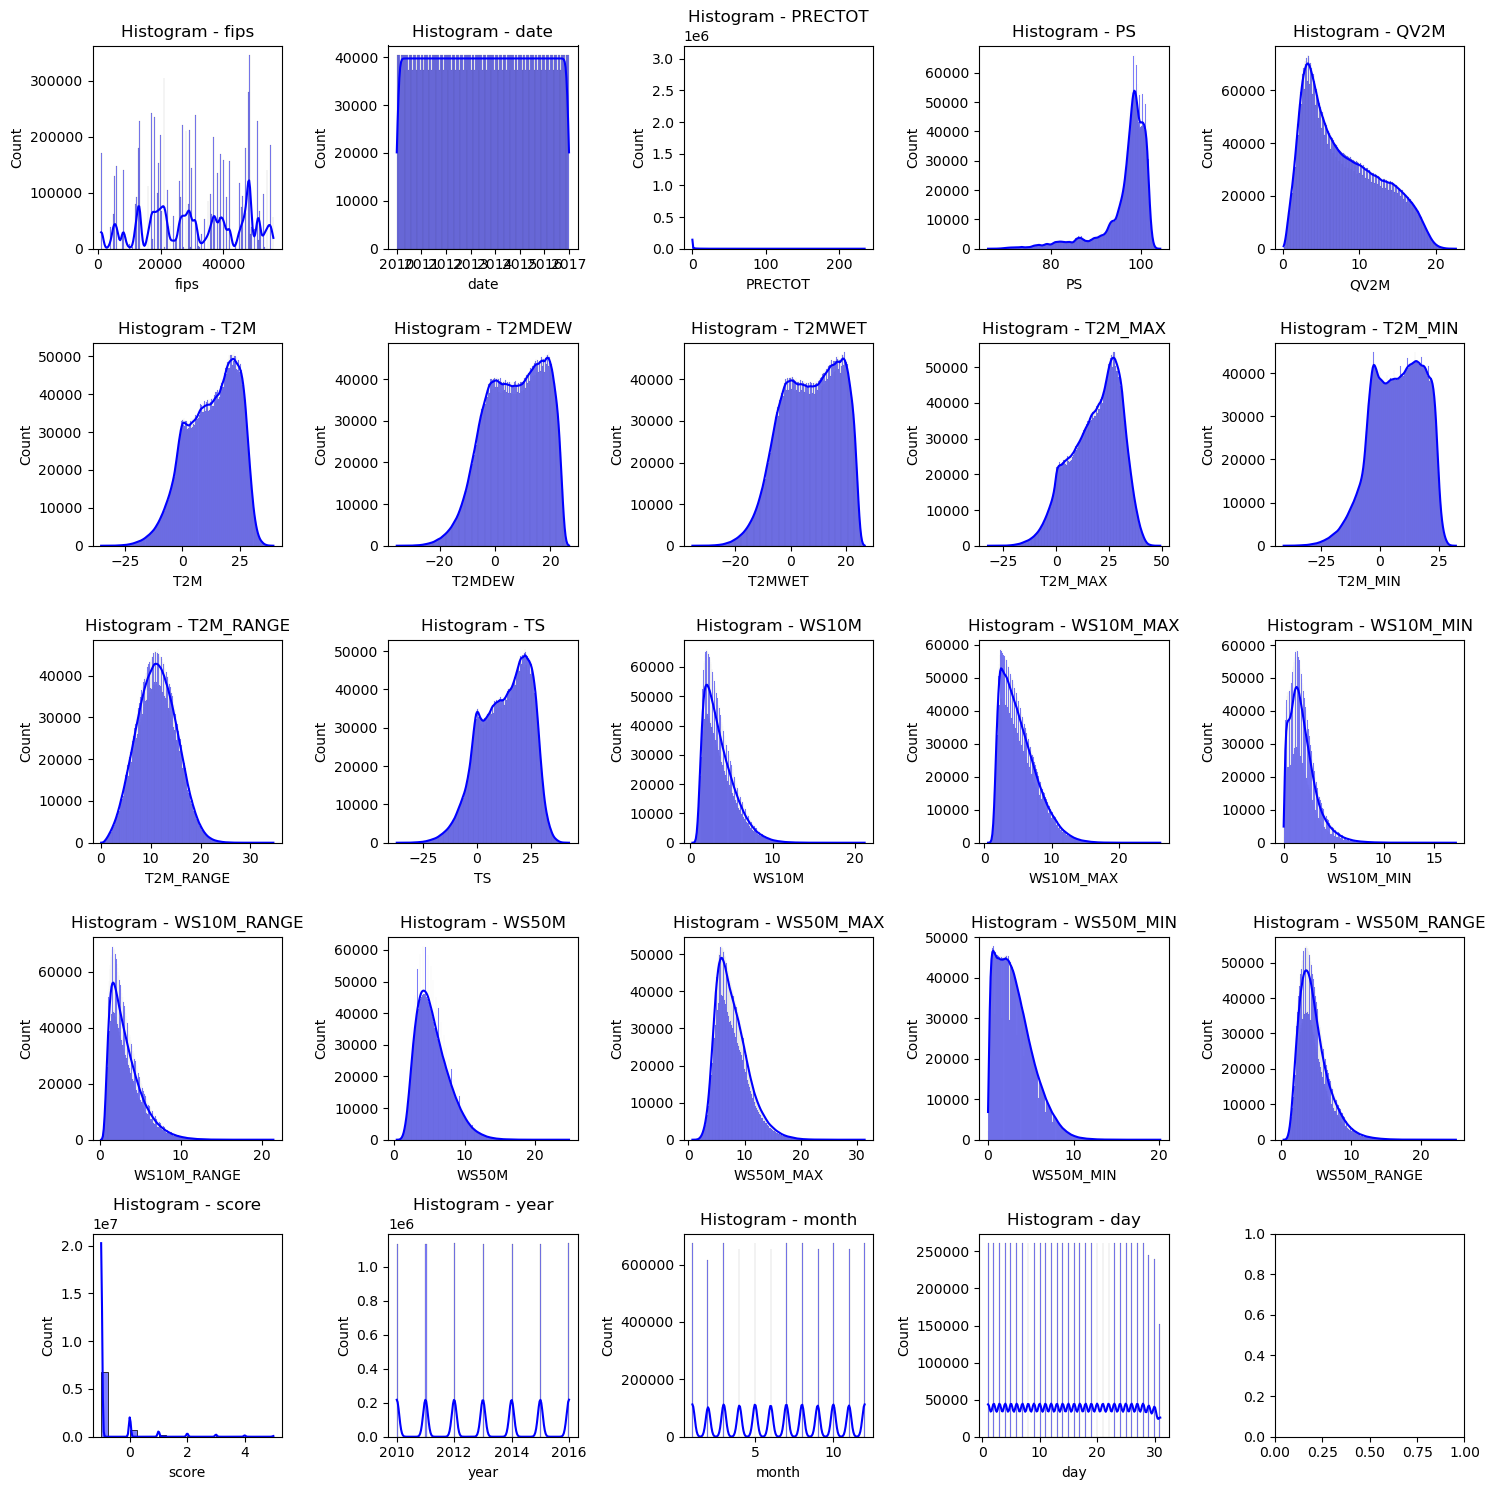

In [28]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Loop through each column and plot histograms
for i, column in enumerate(df.columns):
    sns.histplot(df[column], ax=axes[i], kde=True, color='blue')
    axes[i].set_title(f'Histogram - {column}')

# Adjust layout
plt.tight_layout()
plt.show()

In [37]:
column_list = ['PRECTOT','PS','QV2M','T2M','T2MDEW','T2MWET','T2M_MAX','T2M_MIN','T2M_RANGE','TS','WS10M','WS10M_MAX','WS10M_MIN','WS10M_RANGE','WS50M','WS50M_MAX','WS50M_MIN','WS50M_RANGE']

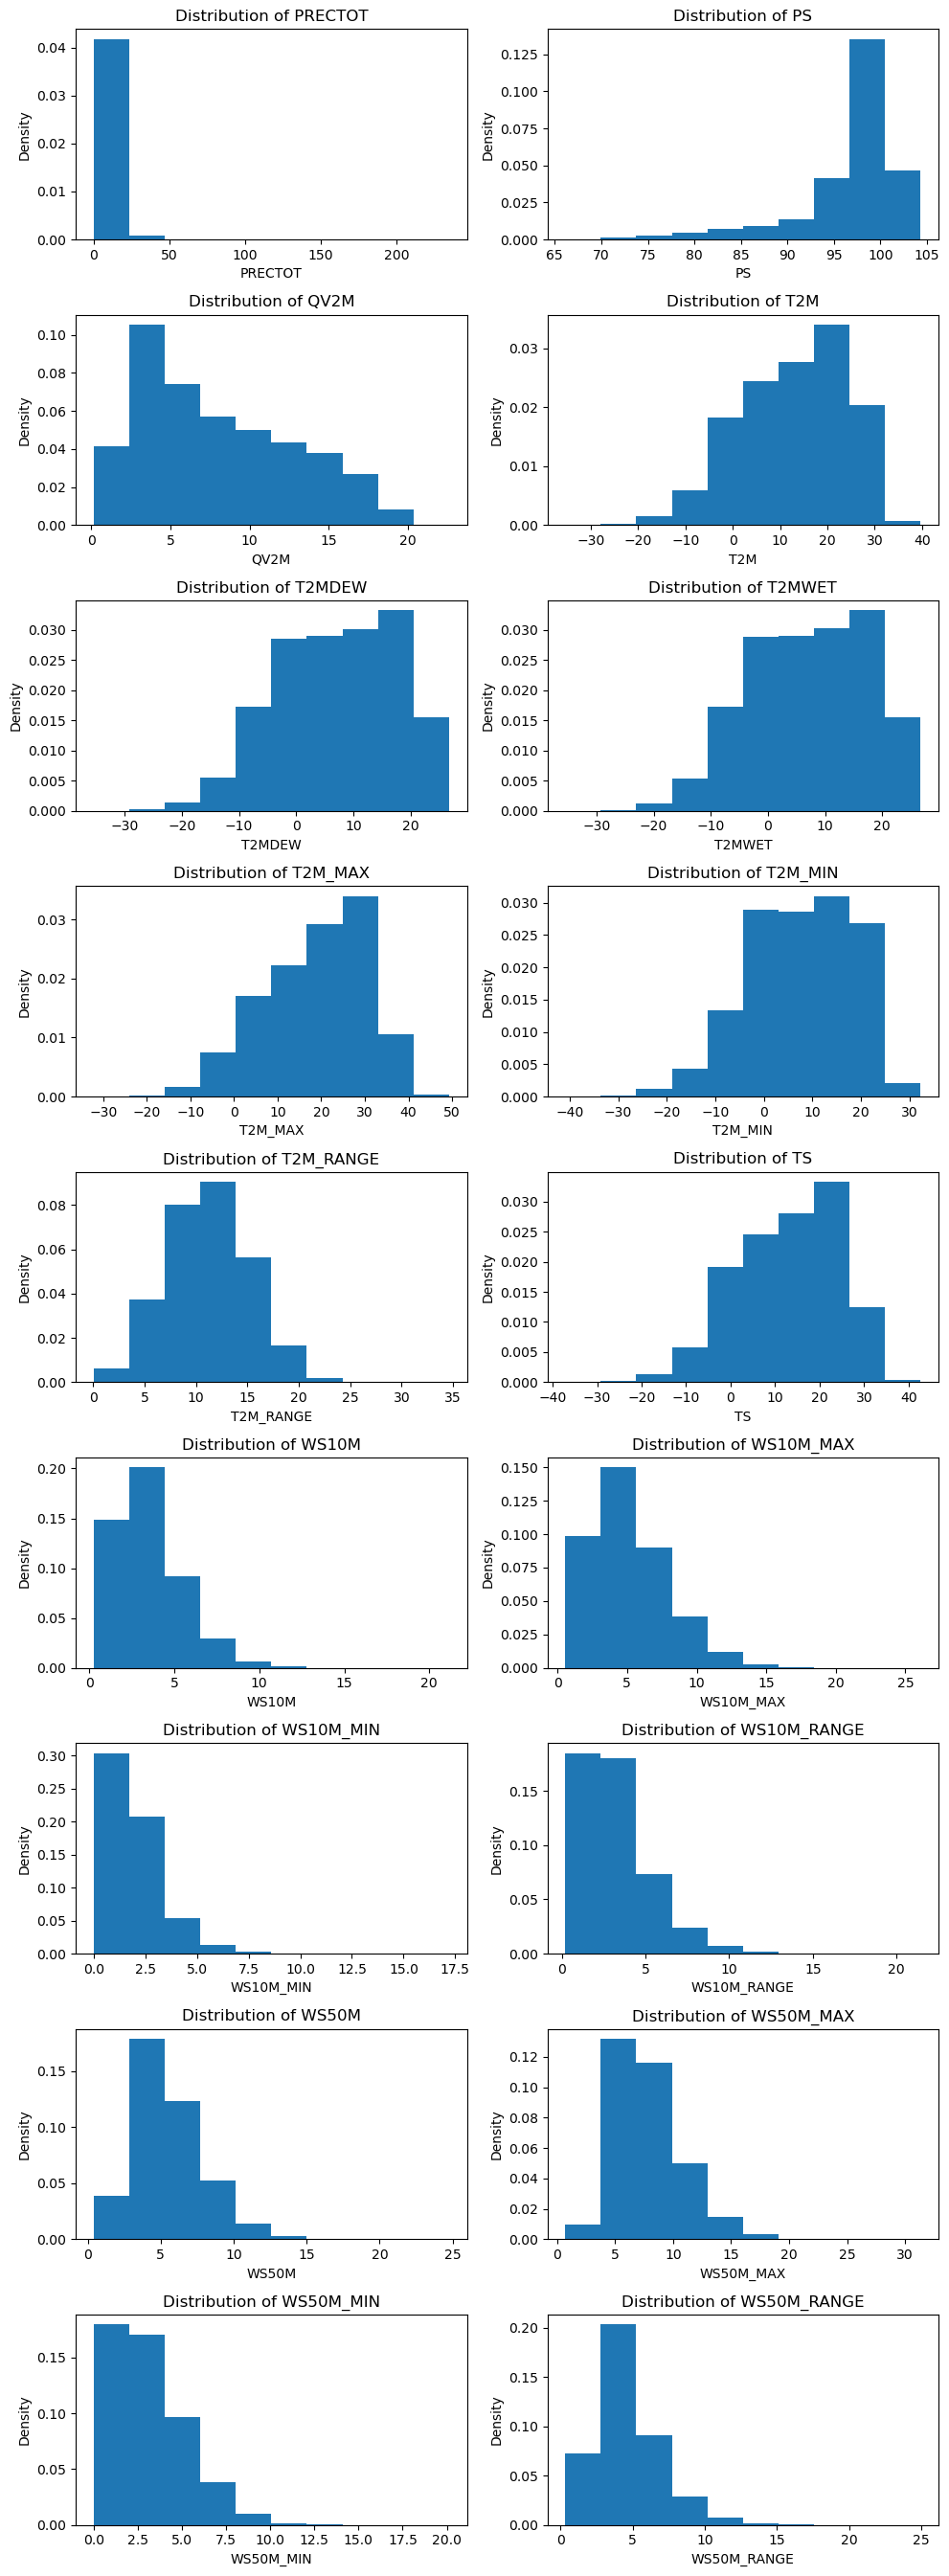

In [42]:
num_columns = 2
num_rows = (len(column_list) + 1) // num_columns

# Create a single figure with subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(10, 3*num_rows))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Loop through the column list and plot histograms
for i, col_name in enumerate(column_list):
    axes[i].hist(df[col_name], density=True)
    axes[i].set_xlabel(col_name)
    axes[i].set_ylabel('Density')
    axes[i].set_title(f'Distribution of {col_name}')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure as a single image
# plt.savefig('all_distributions.png')

# Show the plot if needed
plt.show()

### Checking for Outliers

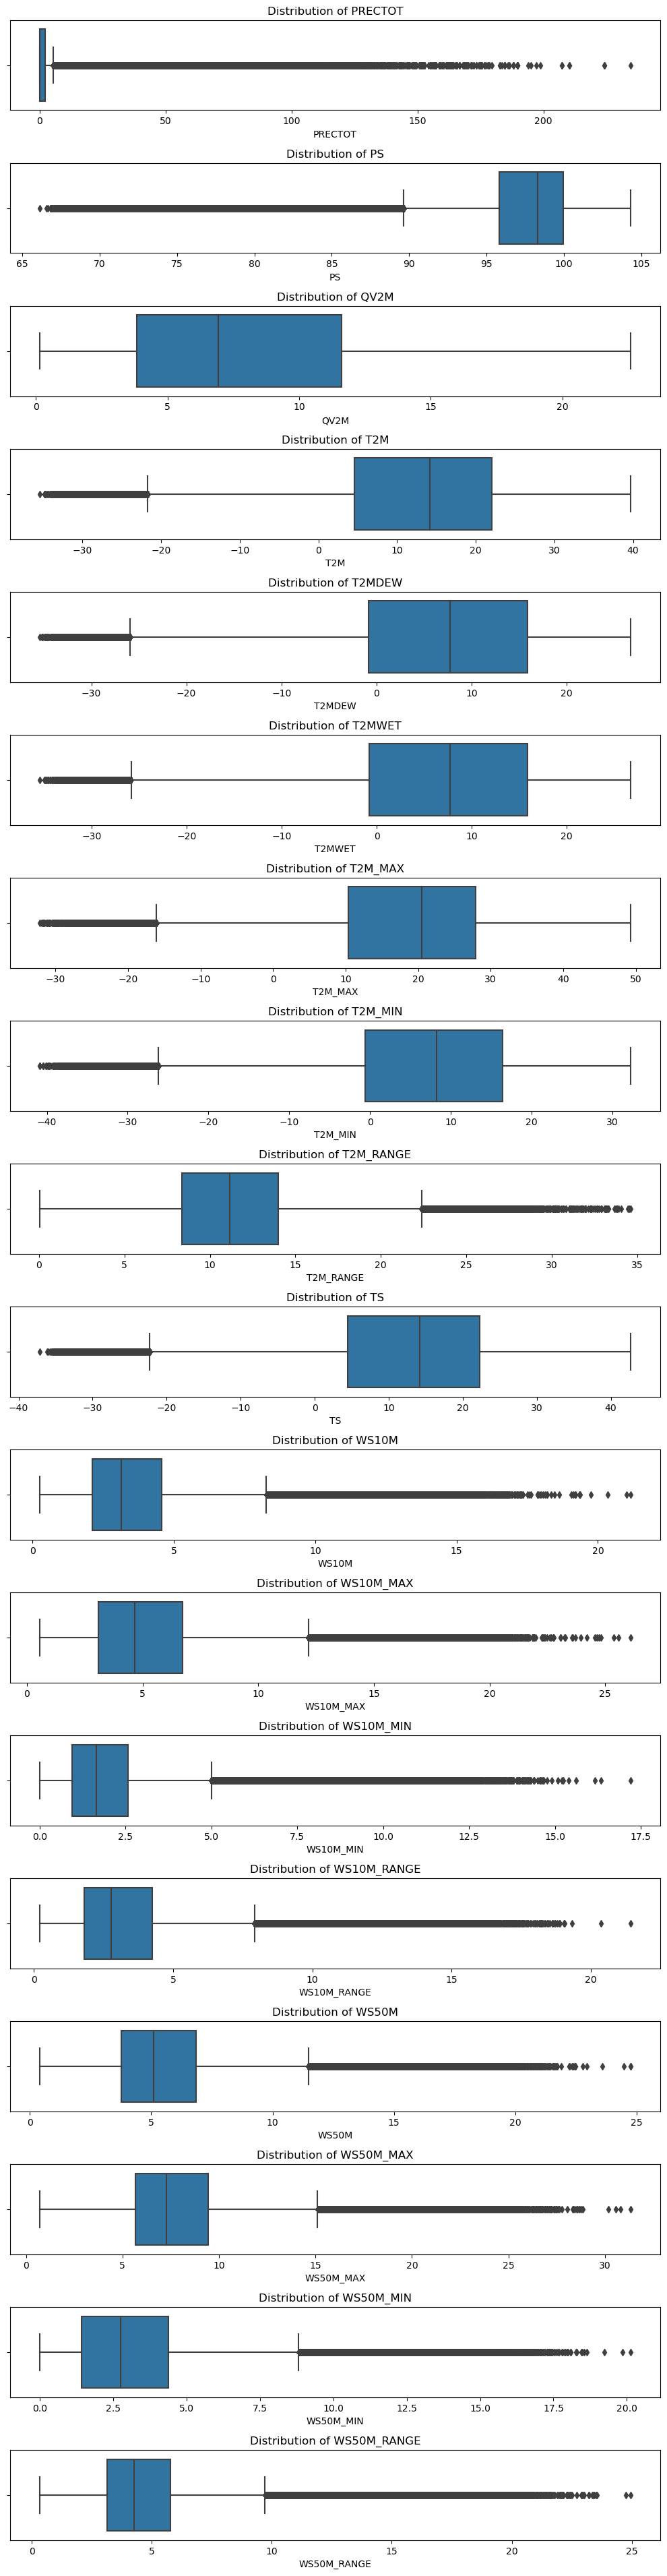

In [105]:
plt.figure(figsize=(10, 40))

for x in range(1, 19):
    plt.subplot(19, 1, x)
    sns.boxplot(x=column_list[x - 1], data=df)
    x_name = column_list[x - 1]
    plt.title(f'Distribution of {x_name}')

plt.tight_layout()

# Save the figure
plt.savefig('boxplots_combined.png')

### Handling outliers

In [106]:
def identify_outliers(df, column):
  mean = df[column].mean()
  std = df[column].std()
  outliers = df[(df[column] > mean + 3 * std) | (df[column] < mean - 3 * std)]
  return len(outliers)

# Print total rows
print(f"Total rows: {len(df.index)}")

# Identify and print outliers for each numerical column
for col in df.select_dtypes(exclude=['object']).columns:
  num_outliers = identify_outliers(df, col)
  # Calculate percentage of outliers
  outlier_pct = (num_outliers / len(df)) * 100
  print(f"Number of outliers in '{col}': {num_outliers} ({outlier_pct:.2f}%)")

Total rows: 7947156
Number of outliers in 'fips': 0 (0.00%)
Number of outliers in 'date': 0 (0.00%)
Number of outliers in 'PRECTOT': 183837 (2.31%)
Number of outliers in 'PS': 211135 (2.66%)
Number of outliers in 'QV2M': 4 (0.00%)
Number of outliers in 'T2M': 15332 (0.19%)
Number of outliers in 'T2MDEW': 8317 (0.10%)
Number of outliers in 'T2MWET': 7020 (0.09%)
Number of outliers in 'T2M_MAX': 12512 (0.16%)
Number of outliers in 'T2M_MIN': 21476 (0.27%)
Number of outliers in 'T2M_RANGE': 10756 (0.14%)
Number of outliers in 'TS': 15781 (0.20%)
Number of outliers in 'WS10M': 88455 (1.11%)
Number of outliers in 'WS10M_MAX': 69376 (0.87%)
Number of outliers in 'WS10M_MIN': 115723 (1.46%)
Number of outliers in 'WS10M_RANGE': 109271 (1.37%)
Number of outliers in 'WS50M': 69387 (0.87%)
Number of outliers in 'WS50M_MAX': 78812 (0.99%)
Number of outliers in 'WS50M_MIN': 59124 (0.74%)
Number of outliers in 'WS50M_RANGE': 102603 (1.29%)
Number of outliers in 'score': 257444 (3.24%)
Number of outl

In [109]:
numerical_columns = df.select_dtypes(exclude=['object']).columns

for column in numerical_columns:
    mean_value = df[column].mean()
    std_value = df[column].std()
    
    # Keep values within the range of mean ± 3 * standard deviation
    df = df[(df[column] <= mean_value + 3 * std_value) & 
                            (df[column] >= mean_value - 3 * std_value)]

print('Total rows =', len(df.index))

Total rows = 6888742


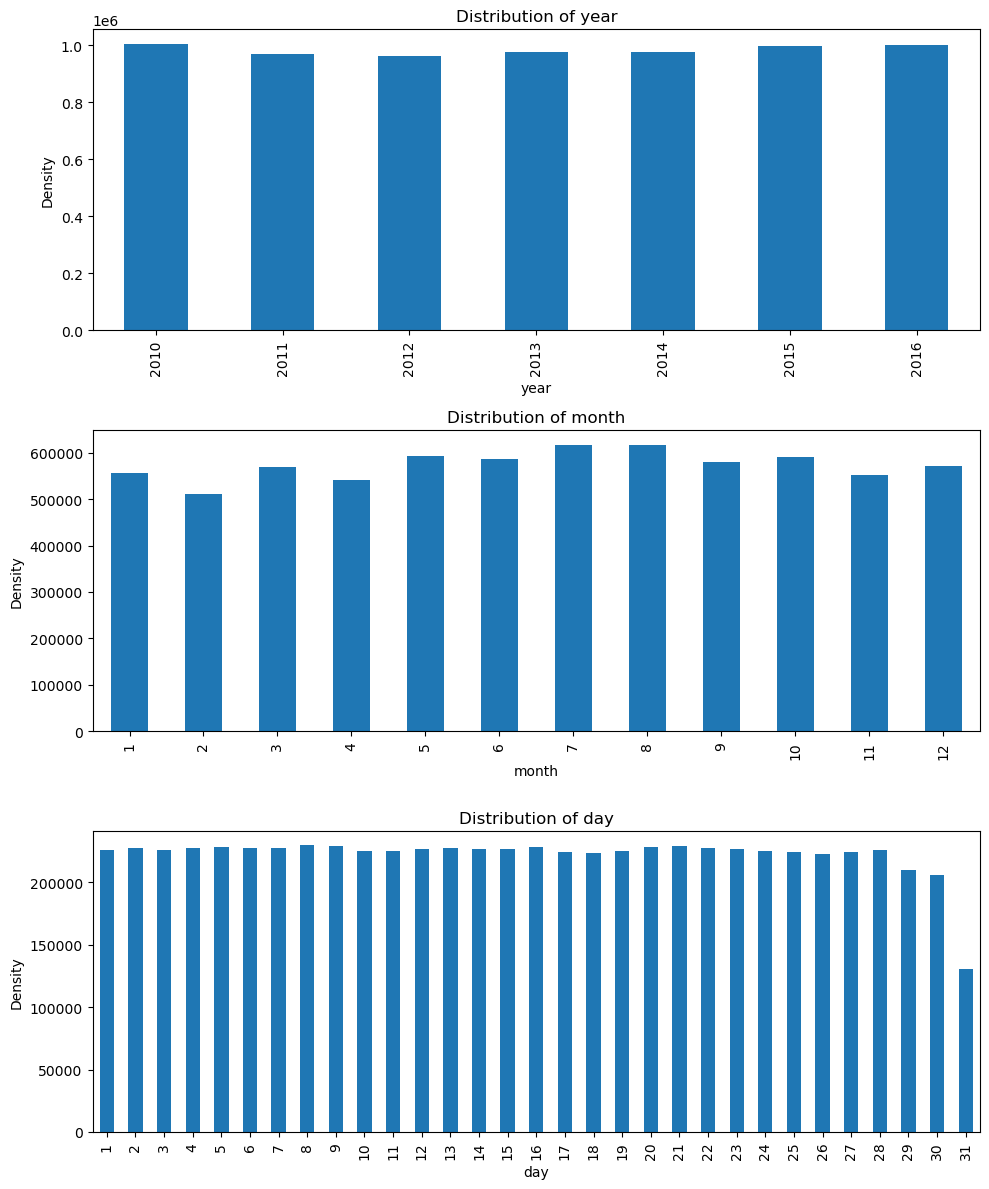

In [116]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 12))

for i, col_name in enumerate(['year', 'month', 'day'], 1):
    plt.subplot(3, 1, i)
    value_counts_sorted = df[col_name].value_counts().sort_index()  # Sort values based on x-axis values
    value_counts_sorted.plot(kind='bar')
    
    x_name = col_name
    y_name = 'Density'
    
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title(f'Distribution of {x_name}')
    plt.tight_layout()

plt.show()


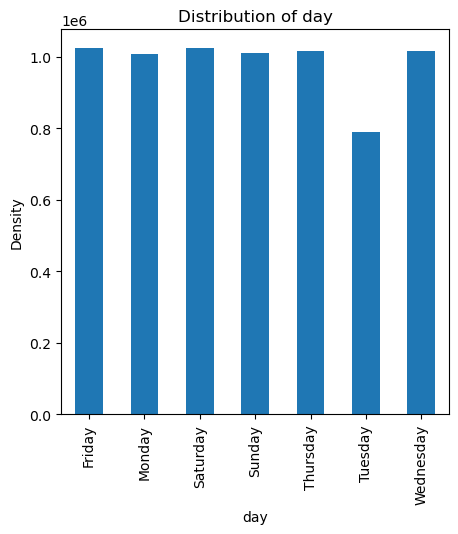

In [121]:
plt.figure(figsize=(5, 5))
value_counts_sorted = df['day_of_week'].value_counts().sort_index()  # Sort values based on x-axis values
value_counts_sorted.plot(kind='bar')

x_name = col_name
y_name = 'Density'

plt.xlabel(x_name)
plt.ylabel(y_name)
plt.title(f'Distribution of {x_name}')
plt.show()